PROBLEM 1

In [1]:
import numpy as np

In [2]:
#The state space is 1-dimensional.
N=100 #number of states.
A=2
q_low=0.51 #probability of success of action a_low, prob. of decreasing the size of the queue.
q_high=0.6 #probab ility of success of action a_high, prob. of decreasing the size of the queue.
p=0.5 #probability that the queue increases by 1.
actions=[0,1]
def reward(x,a):
    if a==1:
        return -(x/N)**2-0.01
    return -(x/N)**2

gamma=0.9

In [3]:
#We are going to build the transition matrix 
#P[x,y,a] gives the probability of moving from state x to state y when taking action a.
#We will consider x-x_{t+1}; y-x_{t}; a, the action.
q_s=[q_low,q_high]
P = np.zeros((N,N,A))
for a in range(A):
    P[0,1,a]=p*(1-q_s[a])
    P[0,0,a]=p*q_s[a] + (1-p)*(1-q_s[a])+(1-p)*q_s[a]
    for x in range(1,N-1):
        P[x,x+1,a]=p*(1-q_s[a])
        P[x,x,a]=p*q_s[a] + (1-p)*(1-q_s[a])
        P[x,x-1,a]=(1-p)*q_s[a]
    P[N-1,N-1,a]=p*q_s[a] + (1-p)*(1-q_s[a])+p*(1-q_s[a])
    P[N-1,N-2,a]=(1-p)*q_s[a]

In [4]:
#Definition of policies

In [5]:
pi_lazy = np.zeros((N,2))
for x in range(N):
    pi_lazy[x,0]=1

pi_agg=np.zeros((N,2))
for x in range(N):
    if x<50:
        pi_agg[x,0]=1
    else:
        pi_agg[x,1]=1

In [6]:
#Calculation of the transition matrix for policy pi_lazy
def trans(P,pi): # constructs X by X transition matrix for policy pi_lazy
    X = np.size(P,0)
    P_pi = np.zeros((X,X))
    for x in range(X):
        for y in range(X):
            for a in range(2):
                P_pi[x,y]=P_pi[x,y]+pi[x,a]*P[x,y,a]
    
    return P_pi

In [7]:
P_lazy=trans(P,pi_lazy)
P_agg=trans(P,pi_agg)

In [8]:
r_lazy=np.zeros(N)
for x in range(N):
    r_lazy[x]=reward(x,0)
    
r_agg=np.zeros(N)
for x in range(N):
    if x<50:
        r_agg[x]=reward(x,0)
    else:
        r_agg[x]=reward(x,1)

In [9]:
### policy evaluation subroutine
# either via power iteration or inverting the matrix (I - gamma P_pi)
def evaluate(P,pi,r,gamma):
    X = np.size(P,0)
    value = np.zeros((X))
    matriz= np.linalg.inv((np.eye(X)-gamma*trans(P,pi)))
    value=np.dot(matriz,r)
    
    ### YOUR CODE COMES HERE
    ### YOUR CODE ENDS HERE
    return value

In [10]:
Value_lazy=evaluate(P,pi_lazy,r_lazy,gamma)

In [11]:
Value_agg=evaluate(P,pi_agg,r_agg,gamma)

In [12]:
Value_lazy

array([-3.18660071e-03, -4.63177110e-03, -7.78298975e-03, -1.27784712e-02,
       -1.96914422e-02, -2.85606988e-02, -3.94067951e-02, -5.22406211e-02,
       -6.70679462e-02, -8.38918271e-02, -1.02713883e-01, -1.23534973e-01,
       -1.46355550e-01, -1.71175855e-01, -1.97996017e-01, -2.26816103e-01,
       -2.57636149e-01, -2.90456173e-01, -3.25276186e-01, -3.62096192e-01,
       -4.00916196e-01, -4.41736198e-01, -4.84556199e-01, -5.29376199e-01,
       -5.76196200e-01, -6.25016200e-01, -6.75836200e-01, -7.28656200e-01,
       -7.83476200e-01, -8.40296200e-01, -8.99116200e-01, -9.59936200e-01,
       -1.02275620e+00, -1.08757620e+00, -1.15439620e+00, -1.22321620e+00,
       -1.29403620e+00, -1.36685620e+00, -1.44167620e+00, -1.51849620e+00,
       -1.59731620e+00, -1.67813620e+00, -1.76095620e+00, -1.84577620e+00,
       -1.93259620e+00, -2.02141620e+00, -2.11223620e+00, -2.20505620e+00,
       -2.29987620e+00, -2.39669620e+00, -2.49551620e+00, -2.59633620e+00,
       -2.69915620e+00, -

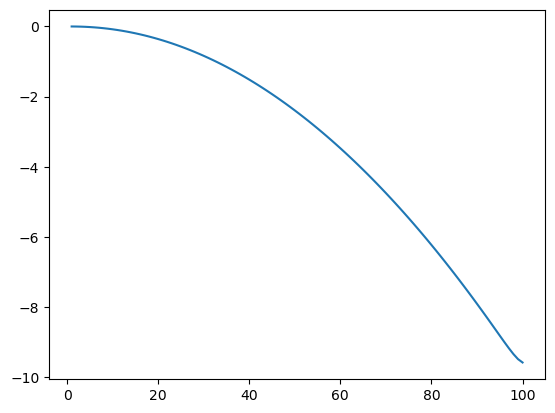

In [14]:
plt.plot(eje_x,Value_lazy)

In [20]:
Value_agg

array([-3.18660071e-03, -4.63177110e-03, -7.78298975e-03, -1.27784712e-02,
       -1.96914422e-02, -2.85606988e-02, -3.94067951e-02, -5.22406211e-02,
       -6.70679462e-02, -8.38918271e-02, -1.02713883e-01, -1.23534973e-01,
       -1.46355550e-01, -1.71175855e-01, -1.97996017e-01, -2.26816103e-01,
       -2.57636149e-01, -2.90456173e-01, -3.25276186e-01, -3.62096192e-01,
       -4.00916196e-01, -4.41736198e-01, -4.84556199e-01, -5.29376200e-01,
       -5.76196200e-01, -6.25016200e-01, -6.75836201e-01, -7.28656202e-01,
       -7.83476204e-01, -8.40296207e-01, -8.99116214e-01, -9.59936227e-01,
       -1.02275625e+00, -1.08757630e+00, -1.15439641e+00, -1.22321660e+00,
       -1.29403699e+00, -1.36685776e+00, -1.44167926e+00, -1.51850221e+00,
       -1.59732801e+00, -1.67815940e+00, -1.76100177e+00, -1.84586572e+00,
       -1.93277207e+00, -2.02176171e+00, -2.11291496e+00, -2.20638964e+00,
       -2.30249578e+00, -2.40184243e+00, -2.50562610e+00, -2.60887166e+00,
       -2.71255760e+00, -

In [13]:
import matplotlib.pyplot as plt
diff=Value_lazy-Value_agg
eje_x = list(range(1, N + 1))

Text(0.5, 1.0, 'Value function lazy - Value function aggressive')

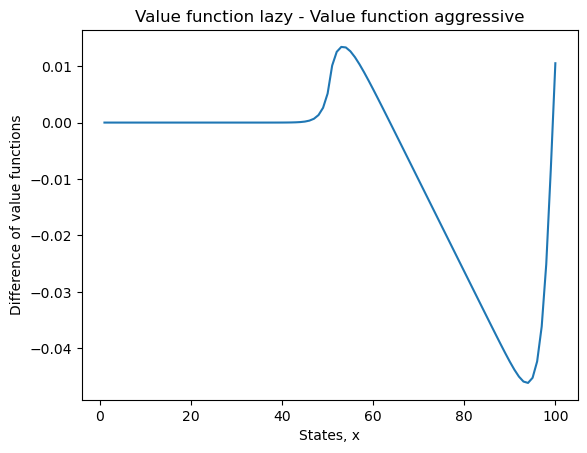

In [22]:
plt.plot(eje_x,diff)
plt.xlabel('States, x')
plt.ylabel('Difference of value functions')
plt.title('Value function lazy - Value function aggressive')

Which policy is better in state 50? What about state 80?

In [23]:
for i in [50,80]:
    if Value_lazy[i-1]>Value_agg[i-1]:
        print('Policy lazy is better in state ' + str(i) + ' than policy aggressive.')
    else:
        print('Policy aggressive is better in state ' + str(i) + ' than policy lazy.')


Policy lazy is better in state 50 than policy aggressive.
Policy aggressive is better in state 80 than policy lazy.


PROBLEM 2: Policy iteration and value iteration.

Policy iteration

In [24]:
def policy_iteration(P,max_iter):
    pi=pi_lazy
    r=r_lazy
    for i in range(max_iter):
        Value=evaluate(P,pi,r,gamma)
        for x in range(N):
            valores=[]
            for a in range(2):
                valor=reward(x,a)
                for y in range(N):
                    valor=valor+gamma*P[x,y,a]*Value[y]
                valores.append(valor)
            pi[x,:]=0
            pi[x,actions[valores.index(max(valores))]]=1
            r[x]=reward(x,actions[valores.index(max(valores))])
    Value=evaluate(P,pi,r,gamma)
    return pi, Value

In [25]:
policy_iteration(P,100)[1]

array([-3.18660071e-03, -4.63177110e-03, -7.78298975e-03, -1.27784712e-02,
       -1.96914422e-02, -2.85606988e-02, -3.94067951e-02, -5.22406211e-02,
       -6.70679462e-02, -8.38918271e-02, -1.02713883e-01, -1.23534973e-01,
       -1.46355550e-01, -1.71175855e-01, -1.97996017e-01, -2.26816103e-01,
       -2.57636149e-01, -2.90456173e-01, -3.25276186e-01, -3.62096192e-01,
       -4.00916196e-01, -4.41736198e-01, -4.84556199e-01, -5.29376199e-01,
       -5.76196200e-01, -6.25016200e-01, -6.75836200e-01, -7.28656200e-01,
       -7.83476200e-01, -8.40296200e-01, -8.99116200e-01, -9.59936200e-01,
       -1.02275620e+00, -1.08757620e+00, -1.15439620e+00, -1.22321620e+00,
       -1.29403620e+00, -1.36685620e+00, -1.44167620e+00, -1.51849620e+00,
       -1.59731620e+00, -1.67813620e+00, -1.76095620e+00, -1.84577620e+00,
       -1.93259620e+00, -2.02141619e+00, -2.11223618e+00, -2.20505617e+00,
       -2.29987613e+00, -2.39669607e+00, -2.49551594e+00, -2.59633568e+00,
       -2.69915519e+00, -

Value Iteration

In [33]:
def value_iteration(P,max_iter):
    V=np.zeros(N)
    r=np.zeros(N)
    Values=np.zeros(N)
    pi=np.zeros((N,2))
    for i in range(max_iter):
        for x in range(N):
            valores=[]
            for a in range(2):
                valor=reward(x,a)+gamma*np.dot(P[x,:,a],V)
                valores.append(valor)
            pi[x,:]=0
            pi[x,actions[valores.index(max(valores))]]=1
            r[x]=reward(x,actions[valores.index(max(valores))])
            Values[x]=r[x]+gamma*np.dot(P[x,:,actions[valores.index(max(valores))]],V)
        if np.allclose(V,Values):
            print(i)
            return V,pi
        V=np.copy(Values)
    return V,pi

In [34]:
V,pi_opt=value_iteration(P,100)

Time for policy iteration with max_iter=10,20,50,100.

In [28]:
import time
time_policy_it=[]
for i in [10,20,50,100]:
    time_start=time.time()
    policy_iteration(P,i)
    time_end=time.time()
    tiempo=time_end-time_start
    time_policy_it.append(tiempo)
    

In [29]:
print(time_policy_it)

[0.17086315155029297, 0.2633018493652344, 0.6544439792633057, 1.2940099239349365]


In [30]:
time_value_it=[]
for i in [10,20,50,100]:
    time_start=time.time()
    value_iteration(P,i)
    time_end=time.time()
    tiempo=time_end-time_start
    time_value_it.append(tiempo)

In [31]:
print(time_value_it)

[0.010469675064086914, 0.019122838973999023, 0.02289295196533203, 0.037252187728881836]


Plot the value functions produced by the two methods after 10, 20, 50, and 100 iterations

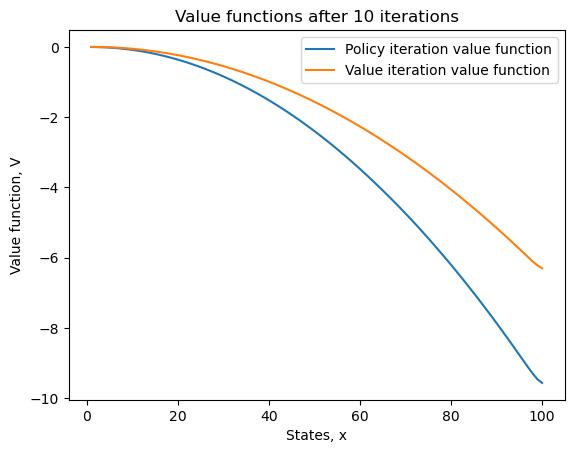

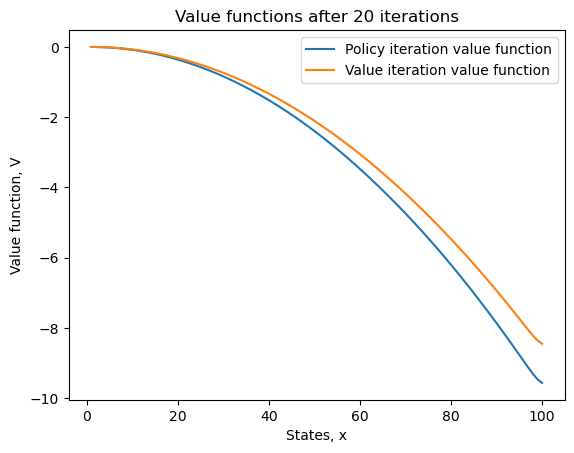

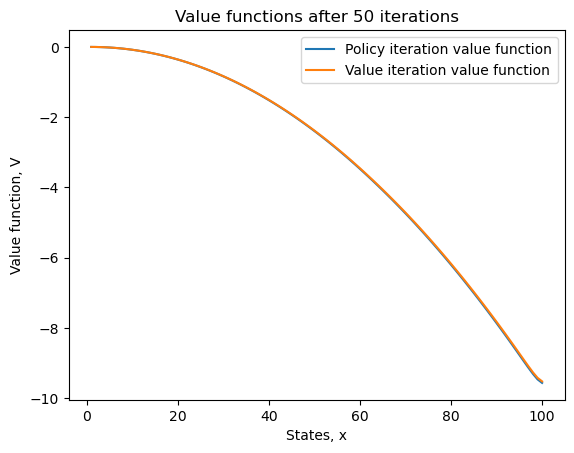

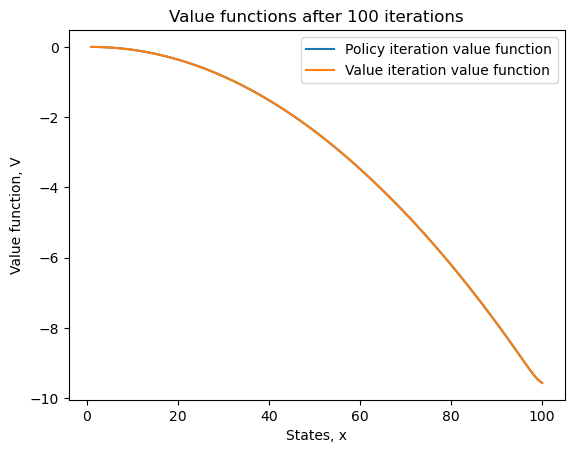

In [32]:
for i in [10,20,50,100]:
    plt.figure()
    plt.plot(eje_x,policy_iteration(P,i)[1], label = 'Policy iteration value function') 
    plt.plot(eje_x,value_iteration(P,i)[0], label = 'Value iteration value function')
    plt.xlabel('States, x')
    plt.ylabel('Value function, V')
    plt.legend()
    plt.title(f'Value functions after {i} iterations')

Which method converges faster to the optimal value function in terms of the number of iterations? 

Clearly from the graphics, one can deduce that the value function from Policy Iteration does not barely change along the iterations (for nº iterations>10), while the value function from Value Iteration Algorithm varies more until converging to the value function from Policy Iteration. Therefore, we conclude that Policy Iteration converges faster to the optimal value function.

What are the respective runtimes of performing 100 iterations with the two methods? What is your interpretation of these results?

Policy Iteration for 100 iterations takes 1.296 s, while Value Iteration for 100 iterations takes 0.03738. We see that Value Iteration takes less CPU time to run for the same number of iterations, where both methods give rise to the same value function (in this number of iterations, not with many less iterations). Therefore, we deduce that Value Function is better for high iterations, because it provides with the good result in less time. We guess that this difference in CPU time can be caused by the fact that Policy Iteration makes use of the function "evaluate", which invertes a 100x100 matrix, hence making the program longer to run.

Based on the results above, plot the difference between the optimal value function and the value functions of the two policies evaluated in Problem1, V* − V_lazy and V* − V_agg! Can you verify that V* strictly improves over these value functions? What is the optimal policy and how is it different from the basic ones evaluated in the first problem?

Let us plot now V*-V_lazy and V*-V_agg to see how this optimal value function improves the other two previuosly obtained.

Text(0.5, 1.0, 'Difference between optimal value function and lazy and aggressive')

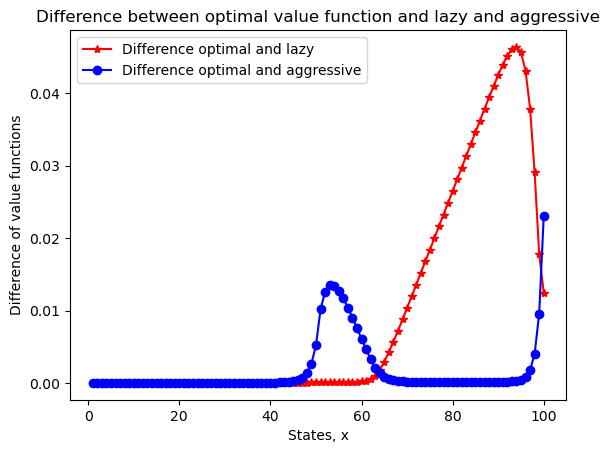

In [35]:
plt.plot(eje_x,V-Value_lazy,color='r',marker='*', label='Difference optimal and lazy')
plt.plot(eje_x,V-Value_agg,color='blue',marker='o', label='Difference optimal and aggressive')
plt.legend()
plt.xlabel('States, x')
plt.ylabel('Difference of value functions')
plt.title('Difference between optimal value function and lazy and aggressive')

Clearly V* improves both V_lazy, V_agg since both differences are positive for all states. This is something we would expect because V* is the best value function, i.e., V*(x)>=V(x) for all x states, for all V, value functions.

The optimal policy is pi_opt:

In [46]:
print(pi_opt)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


Basically, pi_opt chooses the low action for x in {0,...,63}, and then chooses the high action until x=98, while for x=99 it goes back to the low action. 
It coincides with pi_lazy until x=50 and remains with action low until x=63. For x\in {64,...,98}, the optimal policy coincides with policy aggressive and then for x=99, it choses the low action.